## Introduction to data analysis in Python

О чем этот курс:
* Базовые принципы работы с данными в Python
* Базовые принципы машинного обучения
* Задачи машинного обучение
* Обучение/валидация

## Jupyter notebook

Все слайды и картинки были сгенерированы в Jupyter notebook, и наши практики будут проходит в этой среде:
* Рекомендую запускать блоки по очереди один за другим
* Чтобы запустить блок, используйте Shift + Enter

## Disclaimer

В этом курсе будет очень много картинок, и большая часть кода будет использована с целью показать хорошую картинку:
* Рисовать хорошие картинки важно
* Плохие картинки иногда хуже чем отсутствие картинки
* Визуализировать данные невероятно важно: искать паттерны в числах сильно сложнее чем на графике, поэтому все главные результаты статей изображаются чаще всего в качестве картинок, а не в качестве таблиц

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
warnings.simplefilter(action='ignore', category=FutureWarning)


/home/zarina/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Dataset

В файле age_data.tsv находятся данные о количестве раковых инцидентов и возрастные группы этих пациентов на территории UK.

* Датасет, который мы используем в первый день -- игрушечный и маленький
* Главная цель первой практики -- проверить, что у всех всё работает и пройти через самые базовые концепты машинного обучения
* Вторая цель -- мы будем запускать блоки кода, и я хотел, чтобы у вас было бы примерное представление, что происходит внутри блоков, поэтому можно\нужно спрашивать

## Loading data

In [2]:
df = pd.DataFrame.from_csv("age_data.tsv", sep="\t", header=0)
df.head()


,Age End,Male Cases,Female Cases,Male Rates,Female Rates
Age Start,,,,,
0,4,419,358,20.4,18.3
5,9,242,184,12.6,10.0
10,14,228,203,12.6,11.7
15,19,412,389,20.7,20.6
20,24,684,755,31.2,35.5


## Vizualizing the data (always do that)

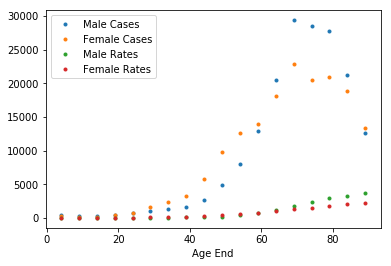

In [3]:
df.plot(x="Age End", style=".")

## Vizualizing the data (always do that)

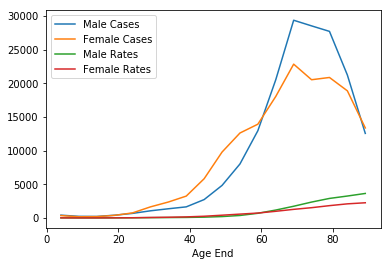

In [4]:
df.plot(x="Age End")

# Linear regression
## Regression

* Пускай есть $n$ объектов
* Каждый объект $x$ описывается набором признаков: $x_1, x_2, ... , x_m$ (есть $m$ признаков)
* Про каждый объект $x$ также известно значение зависимой переменной $y$ (которую мы возможно хотим предсказывать)
* Задача регрессии - нахождение зависимости $y$ от $x_1, x_2, ... , x_m$
* Например нахождение числа раковых инцидентов в зависимости от возраста. Возраст - $x_1$, число раковых инцидентов -$y$

* На самом деле, даже в этой задаче признаков больше, как минимум: возраст - $x_1$, пол - $x_2$, число раковых инцидентов - $y$

# Linear regression
## Regression

Нахождение зависимости:

$$ f(x_1, x_2, ..., x_m) = f(x) \approx y $$

В случае линейной регрессии мы считаем, что функция $f$ имеет очень простой вид:

$$ f(x) = a_0 + a_1 x_1 + a_2 x_2 + ... + a_m x_m $$

Тогда задача линейной регрессии - это нахождение таких коэффициентов $a_0, a_1, a_2 ... a_m$, что $f(x)$ наиболее близка к $y$.

Наибольшая близость определяется минимальной квадратичной ошибкой:

$$ error = \sum_{i=1}^{n} (f(X_i) - y_i)^2 $$

# Our case

Пускай мы хотим уметь предсказывать количество раковых инцидентов (среди мужчин или женщин) в зависимости от возраста используя линейную регрессию.

* n = 18
* m = 1
* Возраст - $x_1$
* Количество инцидентов - $y$

Мы хотим найти функцию $f(x) = a_0 + a_1 x_1$, чтобы $f(x)$ была максимально близка к $y$:
мы хотим найти такие a_0, a_1 что сумма

$$ error = \sum_{i = 1}^{18} (a_0 + a_1 X_{i,1} - y_i) ^ 2 $$ 

минимальна

## Linear regression

In [11]:
X_mat = df.as_matrix(columns=["Age End"])
X_vec = df["Age End"].values

Y = df["Male Rates"].values

# create a Linear Regressor   
lin_regressor = LinearRegression()

# fit this to Linear Regressor
lin_regressor.fit(X_mat, Y) 

# print(lin_regressor.intercept_)
# print(lin_regressor.coef_)


# get the predictions
Y_preds = lin_regressor.predict(X_mat)


## Linear regression plot

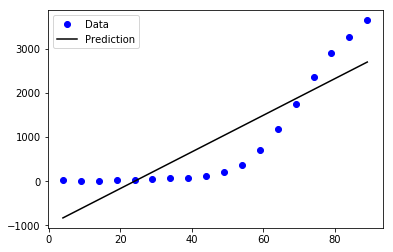

In [12]:

plt.plot(X_vec, Y, "bo")
plt.plot(X_vec, Y_preds, color="black")
plt.legend(["Data", "Prediction"])

## Linear regression plot with errors

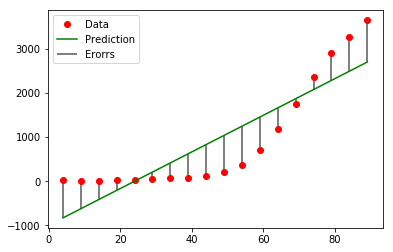

In [16]:
from matplotlib import collections  as mc

lines = [
    [(X_vec[i], Y_preds[i]), (X_vec[i], Y[i])] 
    for i in range(len(X_vec))
]

lc = mc.LineCollection(lines, color="grey", linewidths=2)

fig, ax = plt.subplots()
ax.plot(X_vec, Y, "ro")
ax.plot(X_vec, Y_preds, color="green")
ax.add_collection(lc)
plt.legend(["Data", "Prediction", "Erorrs"])

# Summary
* Линейная регрессия - очень простая модель, и не может точно предсказывать наши данные
* Мы можем воспользоваться полиномиальной регрессией

# Polynomial regression

* Пусть у каждого объекта есть только один параметр $x$ и переменная, которую мы пытаемся предсказать $y$.
* Будем выбирать функцию $f$ из множества функций вида:
$$ f(x) = a_0 + a_1 x + a_2 x^2 + ... + a_m x^m ,$$
где m - степень многочлена (полинома)


* В случае $m = 1$, полиномиальная регрессия - это линейная регрессия: $f(x) = a_0 + a_1 x$
* В случае $m = 2$, полиномиальная регрессия ищет некоторую параболу $f(x) = a_0 + a_1 x + a_2 x^2$
* Чем больше $m$, тем сложнее множество функций из которых мы делаем выбор
* Начнём с 1 и будем постепенно увеличивать $m$

## Polynomial regression

In [42]:
X_mat = df.as_matrix(columns=["Age End"])
X_vec = df["Age End"].values

Y = df["Male Rates"].values

# create a Linear Regressor   
lin_regressor = LinearRegression()

# # pass the order of your polynomial here  
poly = PolynomialFeatures(3)

# # convert to be used further to linear regression
X_transform = poly.fit_transform(X_mat)

# fit this to Linear Regressor
lin_regressor.fit(X_transform, Y) 

# print(lin_regressor.intercept_)
# print(lin_regressor.coef_)

# get the predictions
Y_preds = lin_regressor.predict(X_transform)


## Polynomial regression plot

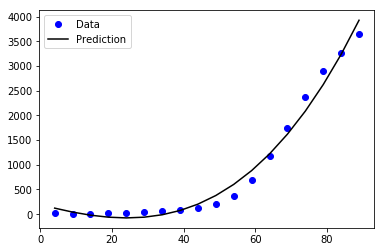

In [43]:
plt.plot(X_vec, Y, "bo")
plt.plot(X_vec, Y_preds, color="black")
plt.legend(["Data", "Prediction"])

## Polynomial regression plot with errors

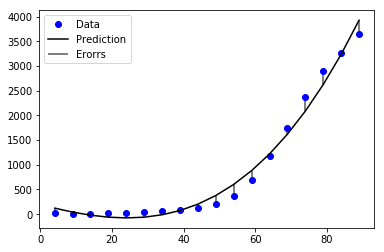

In [44]:
from matplotlib import collections  as mc

lines = [[(X_vec[i], Y_preds[i]), 
          (X_vec[i], Y[i])] 
         for i in range(len(X_vec))]

lc = mc.LineCollection(lines, color="grey", linewidths=2)

fig, ax = plt.subplots()
ax.plot(X_vec, Y, "bo")
ax.plot(X_vec, Y_preds, color="black")
ax.add_collection(lc)
plt.legend(["Data", "Prediction", "Erorrs"])

# Overfitting

С увеличением $m$ мы подбираем модель, которая всё лучше и лучше подходит под данные, которые мы передали для обучения.
* Сможет ли такая модель хорошо предсказать количество инцидентов для возраста которого нет в выборке?
* Как нам контролировать переобучение?
* Кросс-валидация

# Cross-validation

* Разобьём случайно нашу выборку на обучающую и тестирующую
* Обычно это делается в отношении 80% к 20%, но у нас мало образцов, поэтому мы разобьем попалам


## Cross-validation

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(1)

train, test = train_test_split(df, test_size=9)
print(train)
print(test)

           Age End  Male Cases  Female Cases  Male Rates  Female Rates
Age Start                                                             
50              54        8024         12623       373.2         574.8
0                4         419           358        20.4          18.3
85              89       12566         13379      3643.2        2260.7
80              84       21234         18887      3260.9        2100.0
45              49        4839          9793       209.6         412.7
40              44        2735          5832       123.4         257.0
60              64       20538         18055      1178.2         994.3
55              59       12965         13933       698.0         731.8
25              29        1065          1650        49.0          75.7
           Age End  Male Cases  Female Cases  Male Rates  Female Rates
Age Start                                                             
30              34        1369          2371        64.0         109.4
15    

## Cross-validation

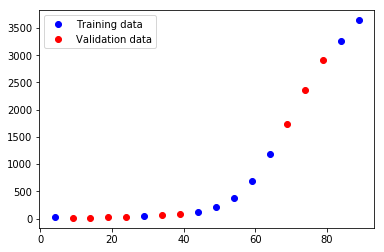

In [46]:
plt.plot(train["Age End"].values, train["Male Rates"].values, "bo")
plt.plot(test["Age End"].values, test["Male Rates"].values, "ro")
plt.legend(["Training data", "Validation data"])

## Polynomial regression with cross-validation

In [47]:
train_mat = train.as_matrix(columns=["Age End"])
train_vec = train["Age End"].values
train_y = train["Male Rates"].values

test_mat = test.as_matrix(columns=["Age End"])
test_vec = test["Age End"].values
test_y = test["Male Rates"].values

# create a Linear Regressor   
lin_regressor = LinearRegression()

# # pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# # convert to be used further to linear regression
train_transform = poly.fit_transform(train_mat)

# fit this to Linear Regressor
lin_regressor.fit(train_transform, train_y) 

# get the predictions for both train and test
X_mat = df.as_matrix(columns=["Age End"])
X_vec = df["Age End"].values
Y = df["Male Rates"].values

X_transform = poly.fit_transform(X_mat)
Y_preds = lin_regressor.predict(X_transform)

## Polynomial regression with cross-validation

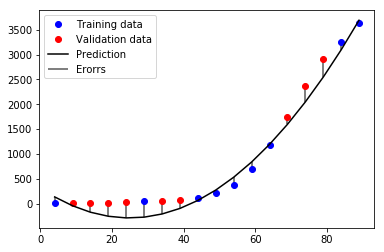

In [48]:
from matplotlib import collections  as mc

lines = [[(X_vec[i], Y_preds[i]), 
          (X_vec[i], Y[i])] 
         for i in range(len(X_vec))]

lc = mc.LineCollection(lines, color="grey", linewidths=2)

fig, ax = plt.subplots()
ax.plot(train_vec, train_y, "bo")
ax.plot(test_vec, test_y, "ro")
ax.plot(X_vec, Y_preds, color="black")
ax.add_collection(lc)
plt.legend(["Training data", "Validation data", "Prediction", "Erorrs"])

# Overfitting

Переобучение можно контролировать, когда есть параметры, которые улучшают модель.

В нашем случае степень многочлена увеличивает точность предсказания.

Мы будем визуализировать ошибку обучения. Ошибка на тренировочном датасете всегда будет уменьшаться, в то время как на валидируещей выборке в какой-то момент вероятно начнёт увеличиваться. В этот момент мы Начинаем переобучаться

# Train/test splitting

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


np.random.seed(1)

train, test = train_test_split(df, test_size=9)

train_mat = train.as_matrix(columns=["Age End"])
train_vec = train["Age End"].values
train_y = train["Male Rates"].values

test_mat = test.as_matrix(columns=["Age End"])
test_vec = test["Age End"].values
test_y = test["Male Rates"].values

# RMSE

Для каждой степени многочлена от 1 до 7:
* Обучим полиномиальную регрессию на тренировочной выборке
* Посчитаем RMSE ошибку на обучающей и валидирующей выборке
* Запишем ответ
* Построим график
* Выберем n

$$ rmse = \sqrt{error} = \sqrt{\sum_{i=1}^{n} (f(X_i) - y_i)^2} $$

## Calculating RMSE

In [50]:
max_n = 7

errors_df = pd.DataFrame(
    data = np.zeros([max_n, 2]),
    index = range(1, max_n + 1),
    columns = ["train_rmse", "test_rmse"]
)

for i in range(max_n):
    n = i + 1
    lin_regressor = LinearRegression() 
    poly = PolynomialFeatures(n)

    train_transform = poly.fit_transform(train_mat)
    test_transform = poly.fit_transform(test_mat)
    lin_regressor.fit(train_transform, train_y) 

    Y_train_preds = lin_regressor.predict(train_transform)
    Y_test_preds = lin_regressor.predict(test_transform)
    errors_df.iloc[i, 0] = np.sqrt(mean_squared_error(Y_train_preds, train_y))
    errors_df.iloc[i, 1] = np.sqrt(mean_squared_error(Y_test_preds, test_y))

## Results

In [51]:
errors_df

,train_rmse,test_rmse
1,726.382751,512.913788
2,148.558161,251.358706
3,108.555790,243.783177
4,41.485235,189.222837
5,26.029745,92.034379
6,7.469852,429.026506
7,2.516648,512.939161


## Plot with results

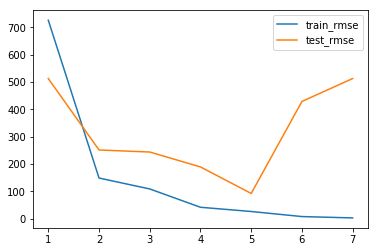

In [52]:
errors_df.plot()

## Quiz

* Что такое задача регрессии?
* Что такое линейная регрессия?
* Что такое полиномиальная регрессия ?
* Что такое переобучение ?
* Зачем делать разделение на обучающую (тренировочную) и тестирующую (валидирующую) выборки?